In [2]:
import pandas as pd
import seaborn as sns
import json

In [3]:
#upload dollhouse excel file
from google.colab import files
uploaded = files.upload()

Saving dollshouse.xlsx to dollshouse.xlsx


In [6]:
df = pd.read_excel('dollshouse.xlsx')
df

countryname  event_count  min_year  max_year  duration  frequency
0      Denmark          156      1879      2015       137       1.14
1       Norway          480      1880      2016       137       3.50
2      Germany          605      1880      2014       135       4.48
3       Sweden          134      1880      2013       134       1.00
4       Poland           96      1880      2013       134       0.72
..         ...          ...       ...       ...       ...        ...
82     Eritrea            1      2009      2009         1       1.00
83     Albania            5      2010      2010         1       5.00
84     Georgia            1      2011      2011         1       1.00
85   Indonesia            1      2011      2011         1       1.00
86     Lebanon            1      2013      2013         1       1.00

[87 rows x 6 columns]

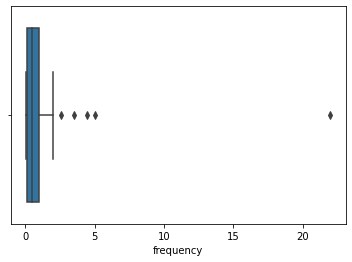

In [49]:
df_freq = sns.boxplot(data=df, x='frequency')
df_freq

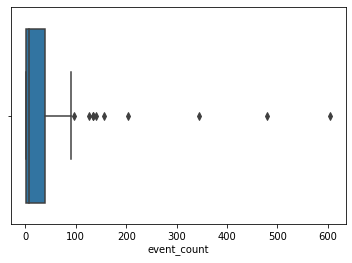

In [50]:
df_ec = sns.boxplot(data=df, x = 'event_count')
df_ec

The boxplots above reveal that the spread of values for the frequency column ranges mostly from 0 to 2 while the values in the event_count column range mostly from 1 to 100.

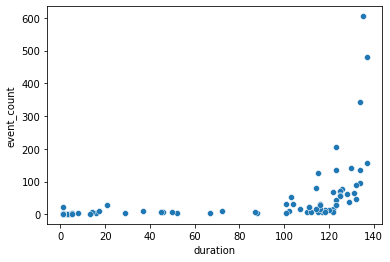

In [13]:
ec_vs_dur = sns.scatterplot(data=df, x = 'duration', y = 'event_count')
ec_vs_dur

The scatterplot above shows the positive exponential relationship between the number of years the plays have been performed and the number of events of each country.

In [14]:
import folium
from folium import Choropleth

In [15]:
#upload ibsen in china csv file
from google.colab import files
uploaded = files.upload()

Saving Ibsen_in_China.csv to Ibsen_in_China.csv


In [23]:
#upload china.geojson file
from google.colab import files
uploaded = files.upload()


Saving china.geojson to china.geojson


In [24]:
cn_json = json.load(open("china.geojson"))
cn_json

{'bbox': [73.55770000000008,
  18.161319468000013,
  134.72635225700003,
  53.53136367800003],
 'features': [{'bbox': [114.84595385700008,
    29.57171999200008,
    119.20297740200007,
    34.10244401400004],
   'geometry': {'coordinates': [[[116.93520653499999, 34.087023381000094],
      [116.940693065, 34.08649067700007],
      [116.94677717400006, 34.08668443400003],
      [116.9576697280001, 34.09221773800009],
      [116.96154898500006, 34.09333151600005],
      [116.96467292100009, 34.09396932900006],
      [116.96836578600002, 34.093845382000026],
      [116.96905444700006, 34.090639183000036],
      [116.96680344800006, 34.083481224000025],
      [116.96013848000007, 34.0716515460001],
      [116.94839678800005, 34.05851016900008],
      [116.94635480100013, 34.053372046000035],
      [116.94887996300005, 34.0435519370001],
      [116.95524525300004, 34.03720364500003],
      [116.95932291700001, 34.024092597000035],
      [116.9589267670001, 34.00914074700006],
      [116.955

In [32]:
df2 = pd.read_csv("Ibsen_in_China.csv")

In [33]:
df2.head()

Province  Count
0          Anhui Province      2
1          Anhui Province      2
2    Beijing Municipality     49
3  Chongqing Municipality      2
4         Fujian Province      3

In [34]:
df2.set_index("Province",inplace=True)

In [35]:
df2.head()

Count
Province                     
Anhui Province              2
Anhui Province              2
Beijing Municipality       49
Chongqing Municipality      2
Fujian Province             3

In [48]:
cn_map = folium.Map(location=[35.9,104.2], zoom_start=4, tiles="cartodbPositron")

Choropleth(geo_data=cn_json,
          data=df2["Count"],
          key_on="feature.id",
          fill_color="OrRd").add_to(cn_map)

cn_map